##LR model

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load the dataset
df = pd.read_csv("Annually Mutual Fund Returns.csv")

# Drop unnecessary column
df.drop(columns=['classification'], inplace=True)

# Convert year columns to numeric
year_cols = [str(year) for year in range(2015, 2025)]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Drop less relevant years
df.drop(columns=['2015', '2016', '2017', '2018'], inplace=True)

# Fill missing values with median
for year in ['2019', '2020', '2021', '2022', '2023', '2024']:
    df[year] = df[year].fillna(df[year].median())

# Encode categorical variables
df["Fund_Encoded"] = LabelEncoder().fit_transform(df["Fund"])
df["Category_Encoded"] = LabelEncoder().fit_transform(df["Category"])

# Simulate future target returns
df["Future_3Y_Return"] = df[["2022", "2023", "2024"]].mean(axis=1) + np.random.normal(0, 0.5, len(df))
df["Future_5Y_Return"] = df[["2020", "2021", "2022", "2023", "2024"]].mean(axis=1) + np.random.normal(0, 0.7, len(df))


In [29]:
features = ["2019", "2020", "2021", "2022", "2023", "2024", "Fund_Encoded", "Category_Encoded"]
target_3y = "Future_3Y_Return"
target_5y = "Future_5Y_Return"

X = df[features]
y_3y = df[target_3y]
y_5y = df[target_5y]


In [30]:
X_train, X_test, y_train_3y, y_test_3y = train_test_split(X, y_3y, test_size=0.2, random_state=42)
_, _, y_train_5y, y_test_5y = train_test_split(X, y_5y, test_size=0.2, random_state=42)


In [31]:
def evaluate(y_true, y_pred, label=""):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    smape_val = smape(y_true, y_pred)
    accuracy = 100 - smape_val

    print(f"\n📊 {label} R² Score: {r2:.4f}")
    print(f"📊 {label} MAE: {mae:.4f}")
    print(f"📊 {label} MSE: {mse:.4f}")
    print(f"📊 {label} RMSE: {rmse:.4f}")
    print(f"✅ {label} Accuracy: {accuracy:.2f}%")


In [36]:
# 3-Year Return Prediction
model_3y = LinearRegression()
model_3y.fit(X_train, y_train_3y)
pred_3y = model_3y.predict(X_test)
evaluate(y_test_3y, pred_3y, "3-Year")

# 5-Year Return Prediction
model_5y = LinearRegression()
model_5y.fit(X_train, y_train_5y)
pred_5y = model_5y.predict(X_test)
evaluate(y_test_5y, pred_5y, "5-Year")


NameError: name 'smape' is not defined

In [ ]:
# Add predicted returns to the original DataFrame
df["Predicted_3Y_Return"] = model_3y.predict(X)
df["Predicted_5Y_Return"] = model_5y.predict(X)

NameError: name 'model_5y' is not defined

In [ ]:
# Define function to predict returns for a specific fund
def predict_for_fund(fund_name):
    fund_row = df[df["Fund"] == fund_name]
    if fund_row.empty:
        print(f"⚠️ Fund '{fund_name}' not found.")
    else:
        pred_3y = fund_row["Predicted_3Y_Return"].values[0]
        pred_5y = fund_row["Predicted_5Y_Return"].values[0]
        print(f"\n🔮 Fund: {fund_name}")
        print(f"📈 Predicted 3-Year Return: {pred_3y:.2f}%")
        print(f"📈 Predicted 5-Year Return: {pred_5y:.2f}%")

# Example usage
predict_for_fund("Quant Small Cap Fund(G)")



🔮 Fund: Quant Small Cap Fund(G)
📈 Predicted 3-Year Return: 26.00%
📈 Predicted 5-Year Return: 48.22%


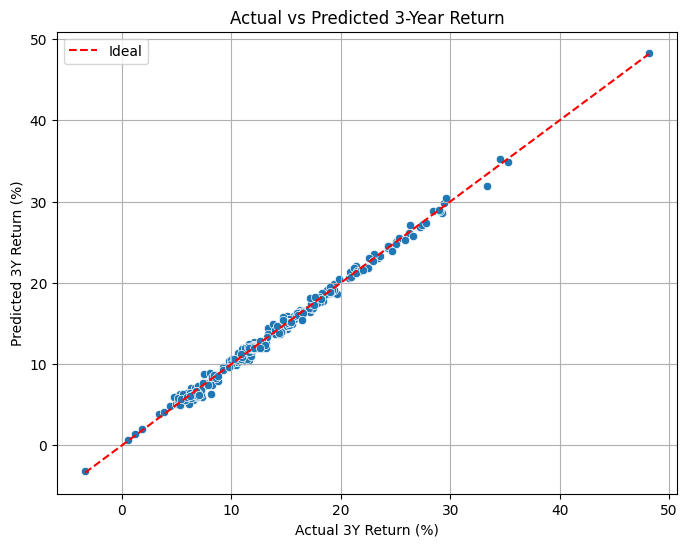

In [ ]:
# 3-Year Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_3y, y=pred_3y)
plt.plot([y_test_3y.min(), y_test_3y.max()], [y_test_3y.min(), y_test_3y.max()],
         'r--', label="Ideal")
plt.title("Actual vs Predicted 3-Year Return")
plt.xlabel("Actual 3Y Return (%)")
plt.ylabel("Predicted 3Y Return (%)")
plt.legend()
plt.grid(True)
plt.show()



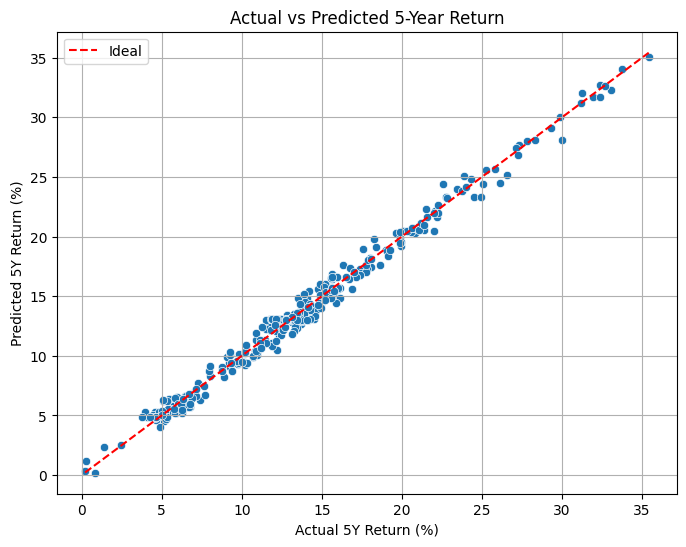

In [ ]:
# 5-Year Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_5y, y=pred_5y)
plt.plot([y_test_5y.min(), y_test_5y.max()], [y_test_5y.min(), y_test_5y.max()],
         'r--', label="Ideal")
plt.title("Actual vs Predicted 5-Year Return")
plt.xlabel("Actual 5Y Return (%)")
plt.ylabel("Predicted 5Y Return (%)")
plt.legend()
plt.grid(True)
plt.show()
